In [4]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [7]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']), header=0, index_col=0, sep=',',lineterminator='\r',encoding='latin-1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,label,tweet
ï»¿,,,
0,1.0,0.0,is upset that he can't update his Facebook by ...
1,2.0,0.0,@Kenichan I dived many times for the ball. Man...
2,3.0,0.0,my whole body feels itchy and like its on fire
3,4.0,0.0,"@nationwideclass no, it's not behaving at all...."
4,5.0,0.0,@Kwesidei not the whole crew


In [8]:
#Function to process/clean the tweets
pun = """!"$%&'()*+,-./:;<=>?[\]^`{|}~"""
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()


def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]", " ", words)
    
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', words, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+','', text)
    text = re.sub(r'\#\w+','', text)
    #remove numbers    
    #digits = '[0-9]'
    #text = re.sub(digits, '', text)
    #Remove emojis
    text = re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)'," ",text)
    text = text.lower().split()
    return " ".join(text)

def remove_numbers(text):
    """The function to removing all numbers"""
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

def remove_stopwords(review):
    """The function to removing stopwords"""
    text = [word.lower() for word in review.split() if word.lower() not in stop_words]
    return " ".join(text)

def get_lemmatize(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [9]:
#print(df.shape)

# Preprocess the data

df['tweet'] = df['tweet'].astype(str)
df['tweet'] = df['tweet'].apply(clean_text)
#print("done")
df['tweet'] = df['tweet'].apply(remove_stopwords)
df['tweet'] = df['tweet'].apply(remove_numbers)
df['tweet'] = df['tweet'].apply(get_lemmatize)
#df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

# remove special characters, numbers and punctuations
#df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

# remove short words
#df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

#tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

# stem the words
#from nltk.stem.porter import PorterStemmer
#stemmer = PorterStemmer()

#tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])


# combine words into single sentence
#for i in range(len(tokenized_tweet)):
    #tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
#df['clean_tweet'] = tokenized_tweet
print(df.head())

with open('data_clean.csv', 'w') as f:
  df.to_csv(f)

      id  label                                              tweet
ï»¿                                                               
0    1.0    0.0  upset update facebook texting might cry result...
1    2.0    0.0  kenichan dived many time ball managed save res...
2    3.0    0.0                    whole body feel itchy like fire
3    4.0    0.0                   nationwideclass behaving mad see
4    5.0    0.0                                kwesidei whole crew


In [10]:
dataset = pd.read_csv('data_clean.csv', header=0, index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Shape

print(dataset.shape)

# Separate into input and output columns
X = dataset['tweet'].values.astype('U')
y = dataset['label'].values.astype('U')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
model = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                  ('tfidf', TfidfTransformer()),
                  ('model', LogisticRegression()), ])
# training
#model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
ytest = np.array(y_test)
pred_y = model.predict(X_test)

# Evaluate predictions
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

# Save the model
with open("sentiment.pkl", "wb") as f:
    pickle.dump(model,f)

(554309, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.7856614529775757
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81     61075
         1.0       0.76      0.76      0.76     49787

    accuracy                           0.79    110862
   macro avg       0.78      0.78      0.78    110862
weighted avg       0.79      0.79      0.79    110862



Text(0.5, 1.0, 'Proportion Target Class')

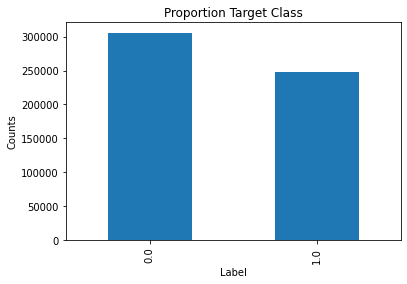

In [12]:
import matplotlib.pyplot as plt
dataset["label"].value_counts().plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

In [19]:
positive = dataset[dataset.label == 1.0]
negative = dataset[dataset.label == 0.0]

positive_words =[]

for data in positive.tweet:
    positive_words.append(str(data)) 
positive_words = ' '.join(positive_words)
positive_words[:48]

negative_words = []

for data in negative.tweet:
    negative_words.append(str(data))
negative_words = ' '.join(negative_words)
negative_words[:455]

'upset update facebook texting might cry result school today also blah kenichan dived many time ball managed save rest go bound whole body feel itchy like fire nationwideclass behaving mad see kwesidei whole crew need hug loltrish hey long time see yes rain bit bit lol fine thanks tatiana k nope twittera que muera spring break plain city snowing pierced ear caregiving bear watch thought ua loss embarrassing octolinz count idk either never talk anymore '

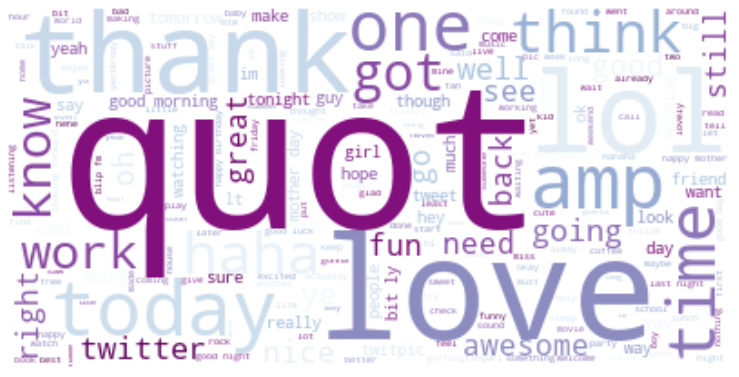

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=len(positive_words),colormap='BuPu')

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

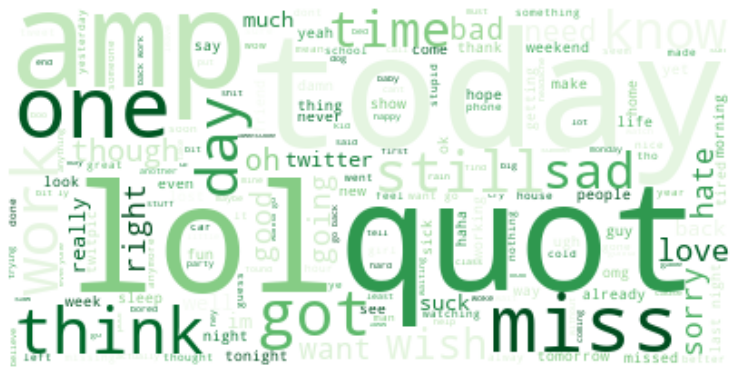

In [24]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='Greens')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
from sklearn.naive_bayes import MultinomialNB
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)
print('accuracy %s' % accuracy_score(pred_y, y_test))

accuracy 0.7686944128736628


In [29]:
from sklearn.linear_model import SGDClassifier
model_svm = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm',SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3, random_state=42)),
                    ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_svm.predict(X_test)
print('accuracy %s' % accuracy_score(y_predict, y_test))

accuracy 0.612852014215872


In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)
print('accuracy %s' % accuracy_score(pred, y_test))

KeyboardInterrupt: ignored

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)
print('accuracy %s' % accuracy_score(ada_pred, y_test))

accuracy 0.566893976294853


In [13]:
print("Classification Report")
print(classification_report(ytest, pred_y))

Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81     61075
         1.0       0.76      0.76      0.76     49787

    accuracy                           0.79    110862
   macro avg       0.78      0.78      0.78    110862
weighted avg       0.79      0.79      0.79    110862



In [16]:
print("Confusion Matrix")
print(confusion_matrix(ytest, pred_y))

Confusion Matrix
[[49340 11735]
 [12033 37754]]


In [18]:
acc=accuracy_score(pred_y, y_test)
print('Accuracy', acc*100, '%')

Accuracy 78.56073316375314 %


In [20]:
# testing
with open('sentiment.pkl', 'rb') as f:
        model = pickle.load(f)
s=['Trump is a good candidate']
s2=["Could hillary clinton have what it takes to defeat the democrats in 2008?"]
a=model.predict(s)
print(s,':',a[0])
a=model.predict(s2)
print(s2,':',a[0])

['Trump is a good candidate'] : 1.0
['Could hillary clinton have what it takes to defeat the democrats in 2008?'] : 0.0
